<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Time_Series_Analysis_With_Seasonal_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
data = pd.read_csv('/content/champagne.csv', encoding= 'unicode_escape')

In [142]:
data.head()

,Month,Perrin Freres monthly champagne sales millions 64-72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [143]:
data.columns = ['Month','Sales']

In [144]:
data.columns

Index(['Month', 'Sales'], dtype='object')

In [145]:
data.isnull().sum()

Month    0
Sales    0
dtype: int64

In [146]:
data.dtypes

Month    object
Sales     int64
dtype: object

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [148]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Data Visualization and Transformation.


In [149]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [150]:
data['Month'] = pd.to_datetime(data['Month'])

In [151]:
data.set_index(data['Month'],inplace=True)

In [152]:
data.drop(columns=['Month'],inplace=True)

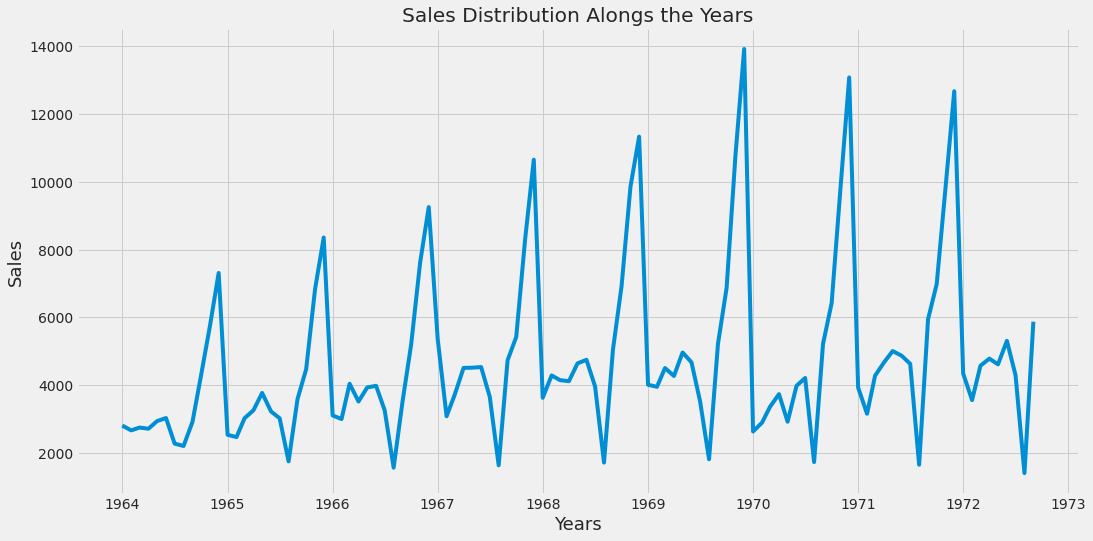

In [153]:

plt.figure(figsize=(16,8))
plt.title('Sales Distribution Alongs the Years')
plt.plot(data['Sales'])
plt.xlabel('Years', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

Data completly looks like Seasonable.So,in order to conclude we have this decision odf the upcoming stastical analysis.

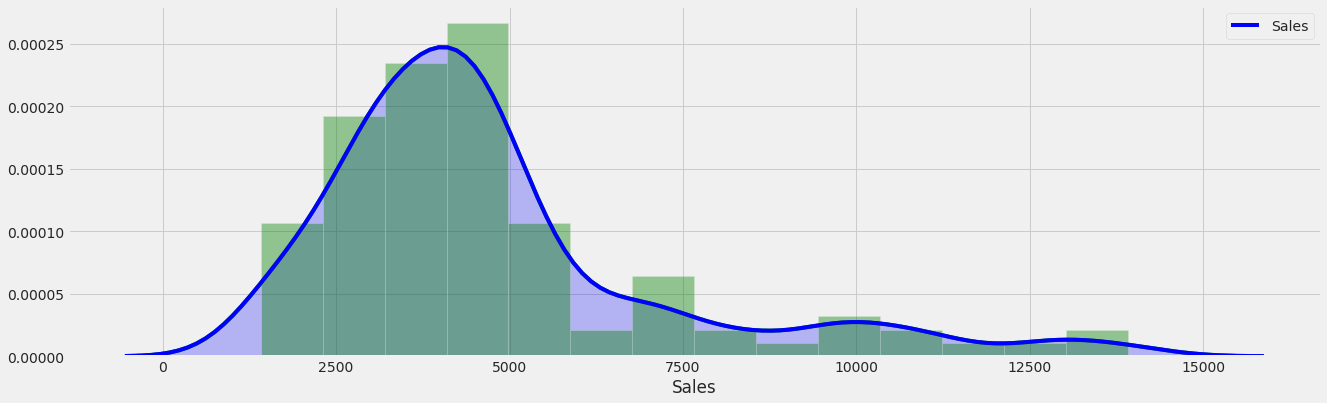

In [154]:
plt.figure(figsize=(20,6))
ax = sns.distplot(data['Sales'],color='g')
sns.kdeplot(data['Sales'],color='b',shade=True)
plt.show()

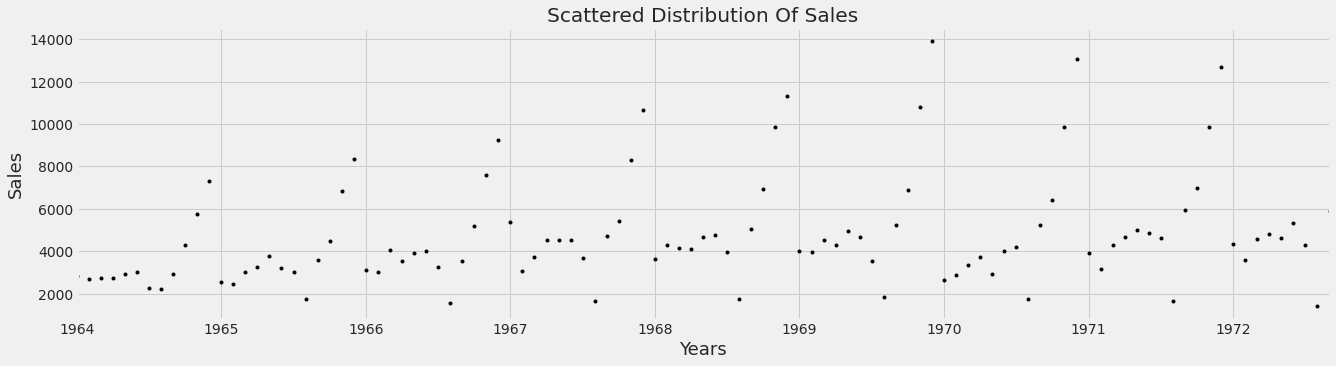

In [155]:
data['Sales'].plot(style='.k',figsize=(20,5),title='Scattered Distribution Of Sales')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

If we can see the maximum Sales is happened in between the 2500 and 5000.

In [156]:
rolling_mean_data = data['Sales'].rolling(window=10).mean()
rolling_std_data  = data['Sales'].rolling(window=10).std()

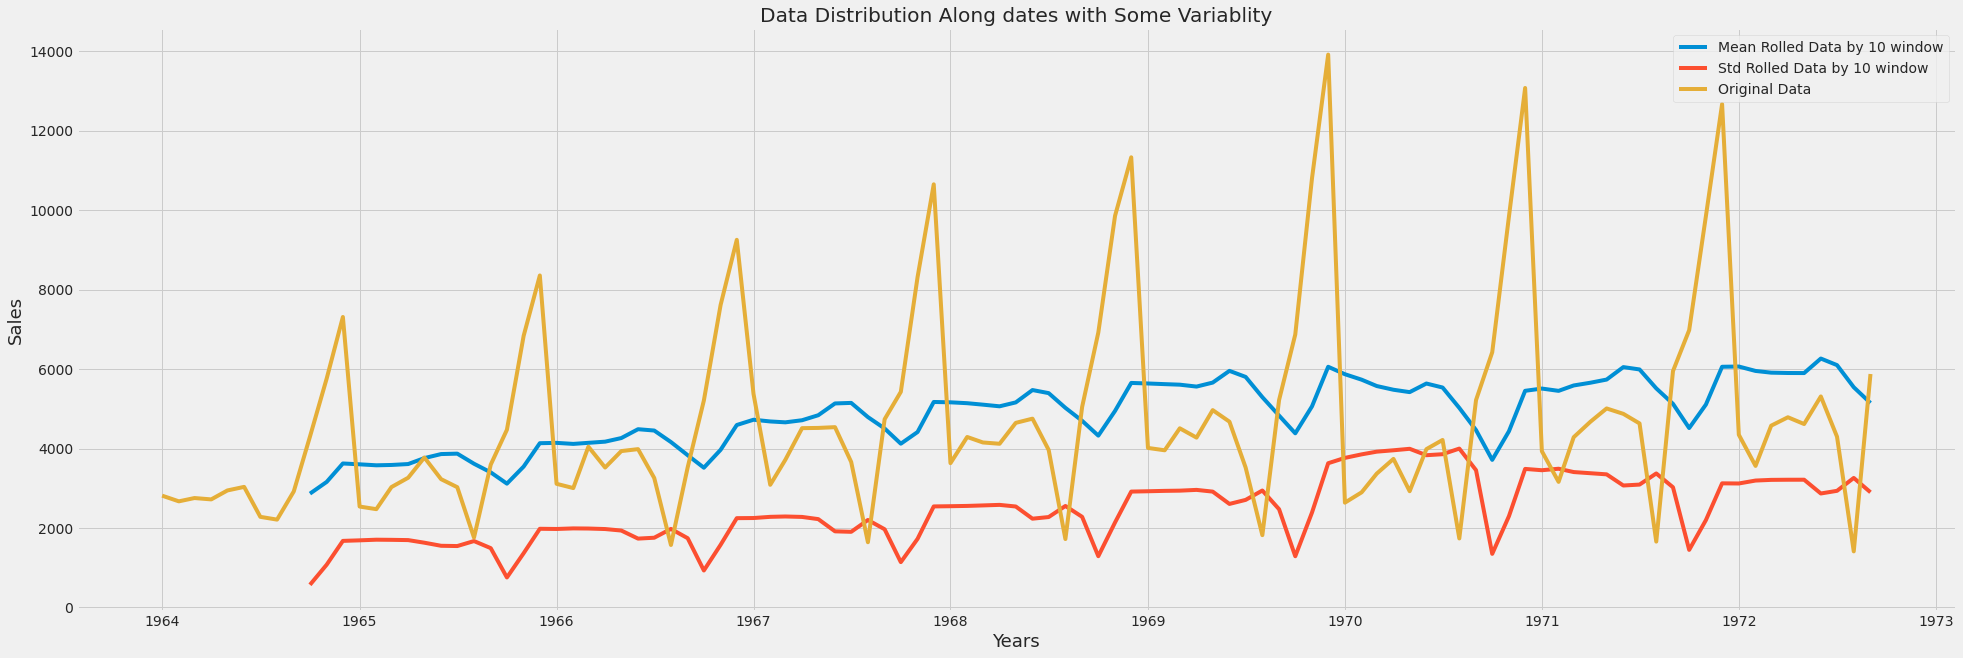

In [157]:
plt.figure(figsize=(30,10))
plt.plot(rolling_mean_data)
plt.plot(rolling_std_data)
plt.plot(data['Sales'])
plt.legend(['Mean Rolled Data by 10 window','Std Rolled Data by 10 window','Original Data'])
plt.title('Data Distribution Along dates with Some Variablity')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.show()

## Some Filering on dates.

In [158]:
sales1967=data['1967']['Sales']
sales1968 = data['1968']['Sales']
sales1969  = data['1969']['Sales']

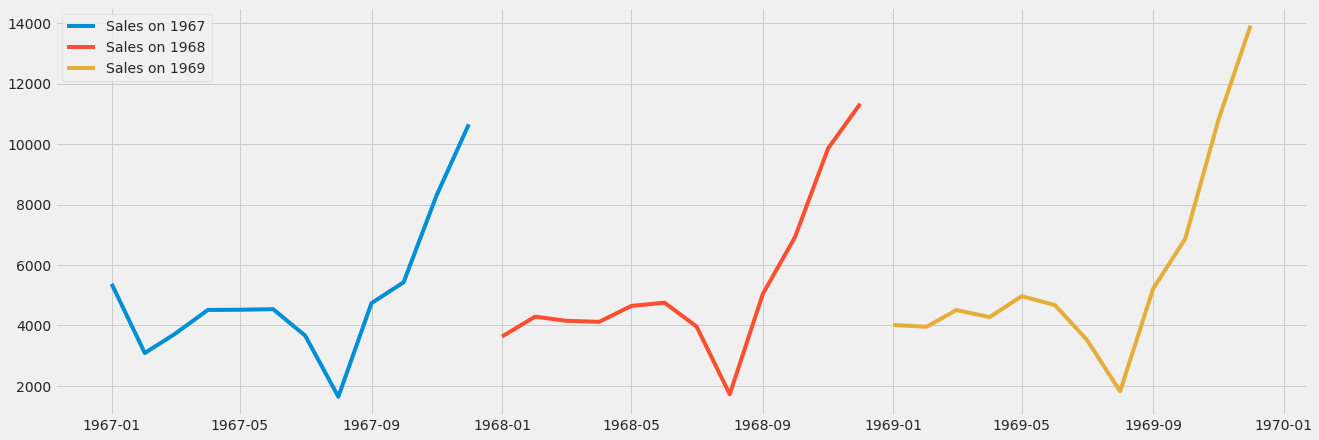

In [159]:
plt.figure(figsize=(20,7))
plt.plot(sales1967)
plt.plot(sales1968)
plt.plot(sales1969)
plt.legend(['Sales on 1967','Sales on 1968','Sales on 1969'])
plt.show()

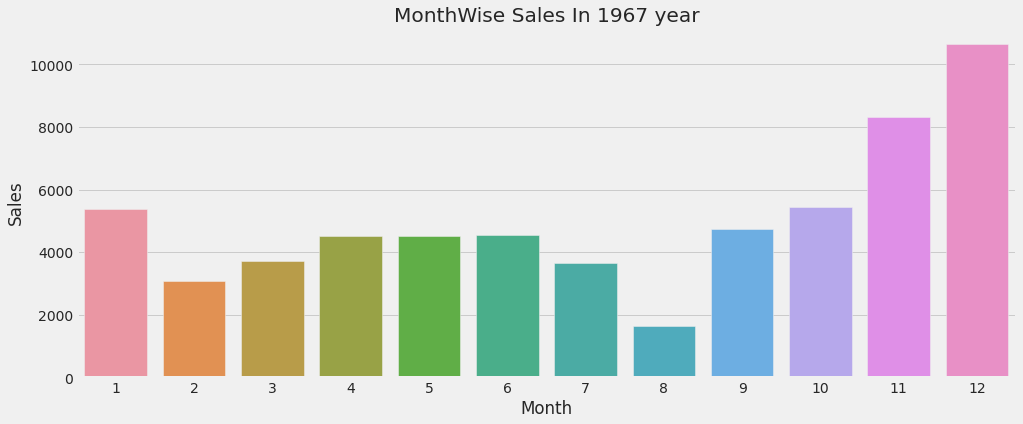

In [160]:
Months1967=data['1967'].index.month
Months1968 = data['1968'].index.month
Months1969 = data['1969'].index.month

plt.figure(figsize=(15,6))
sns.barplot(x=Months1967,y=sales1967)
plt.title('MonthWise Sales In 1967 year')
plt.show()

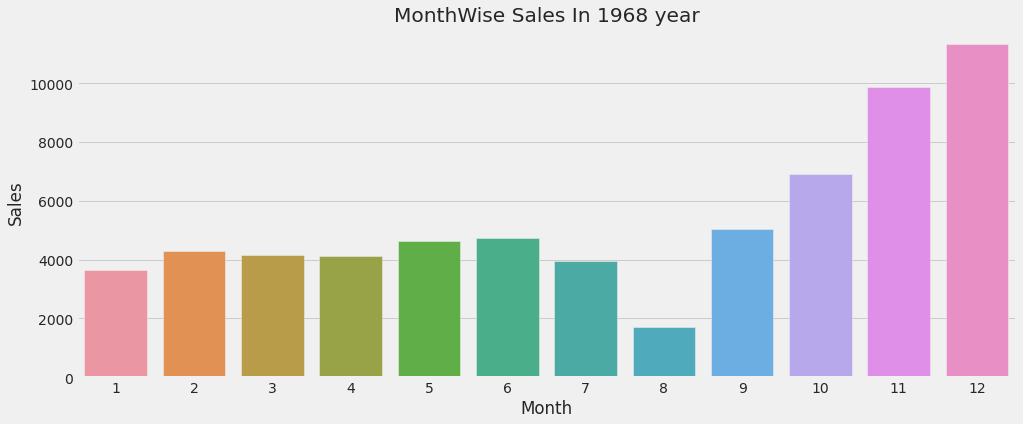

In [161]:
plt.figure(figsize=(15,6))
sns.barplot(x=Months1968,y=sales1968)
plt.title('MonthWise Sales In 1968 year')
plt.show()

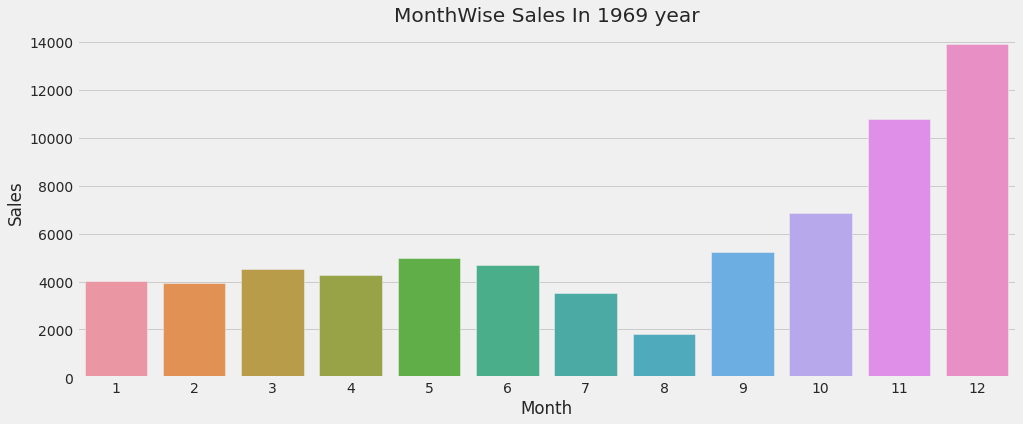

In [162]:
plt.figure(figsize=(15,6))
sns.barplot(x=Months1969,y=sales1969)
plt.title('MonthWise Sales In 1969 year')
plt.show()

From the above we can see,Every Year the sales at 12 month is very high If we compre to the other month is low.Sales raising from sep to dec very high rate.


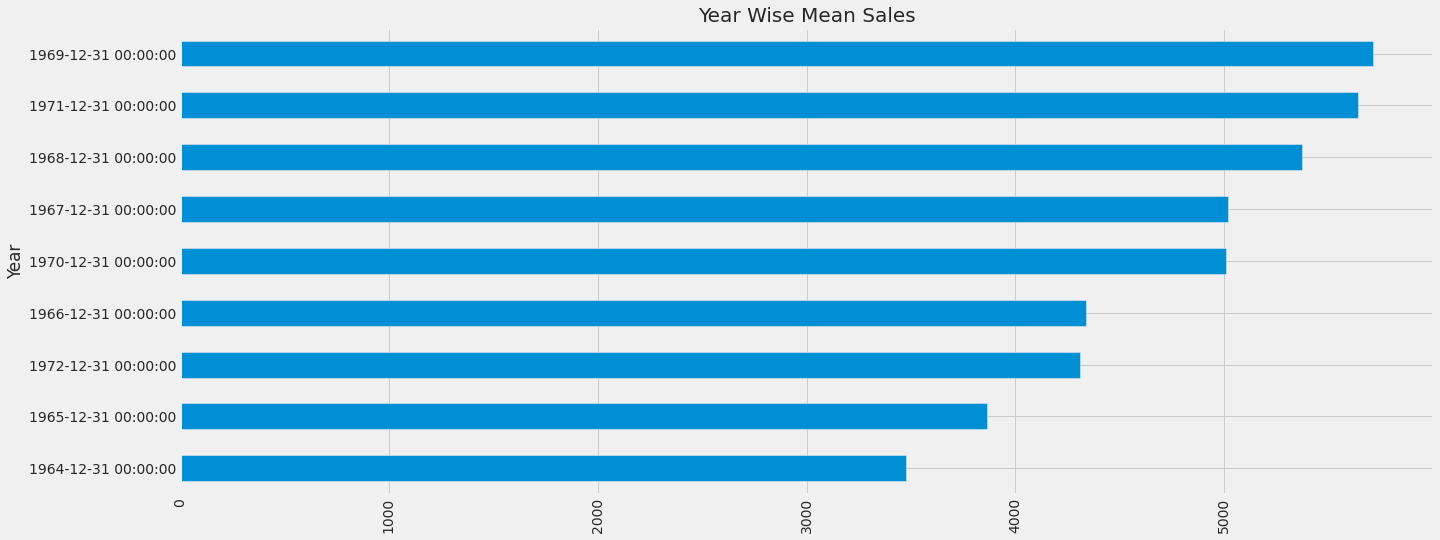

In [163]:
Mean_yearwise = data['Sales'].resample('Y').mean().sort_values(ascending=True)
year = Mean_yearwise.index
plt.figure(figsize=(20,8))
Mean_yearwise.plot(kind='barh')
plt.title('Year Wise Mean Sales',fontsize=20)
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()

In [164]:
Monthly_sales = data.asfreq('200D',method='pad')

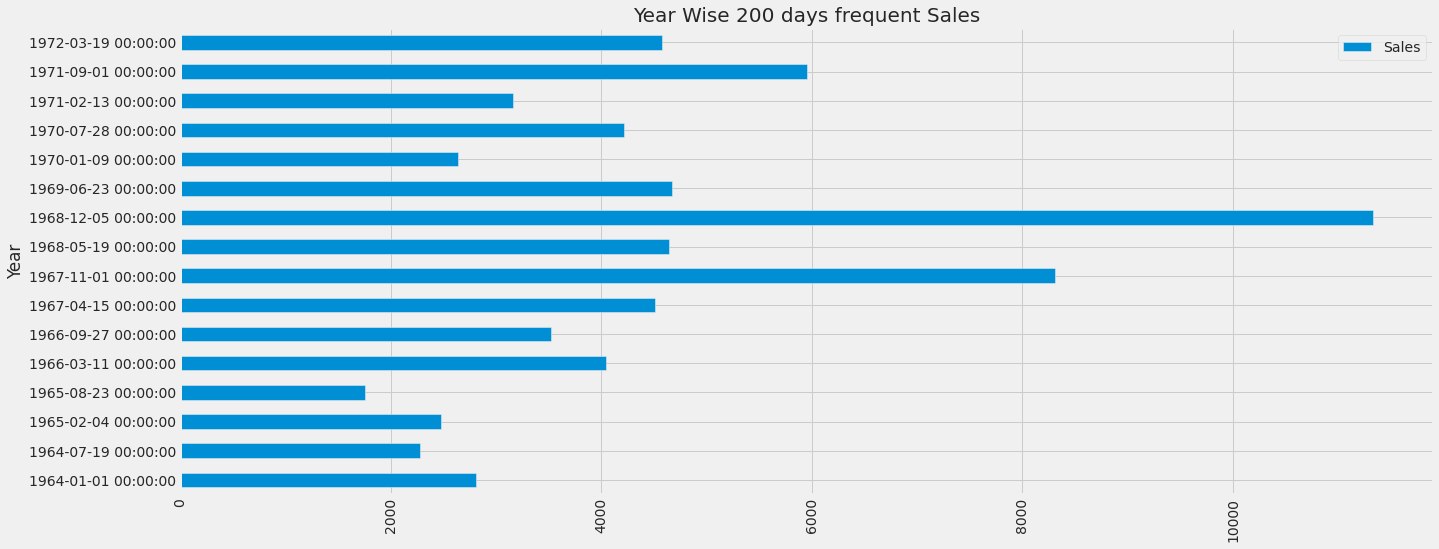

In [165]:
Monthly_sales.plot(kind='barh',figsize=(20,8),title='200 days Frequent sales')
plt.title('Year Wise 200 days frequent Sales',fontsize=20)
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()

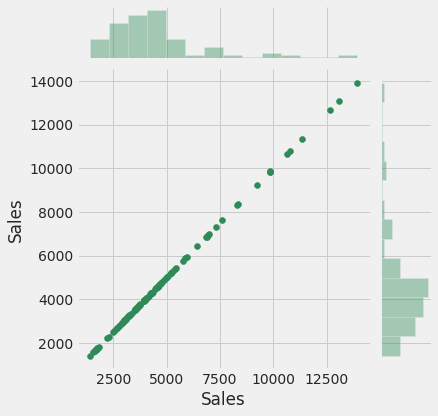

In [166]:
sns.jointplot(data['Sales'],data['Sales'], kind='scatter', color='seagreen')
plt.show()

## Trying to figure out the Difffrent distribution weightage.

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [168]:
y= data['Sales']

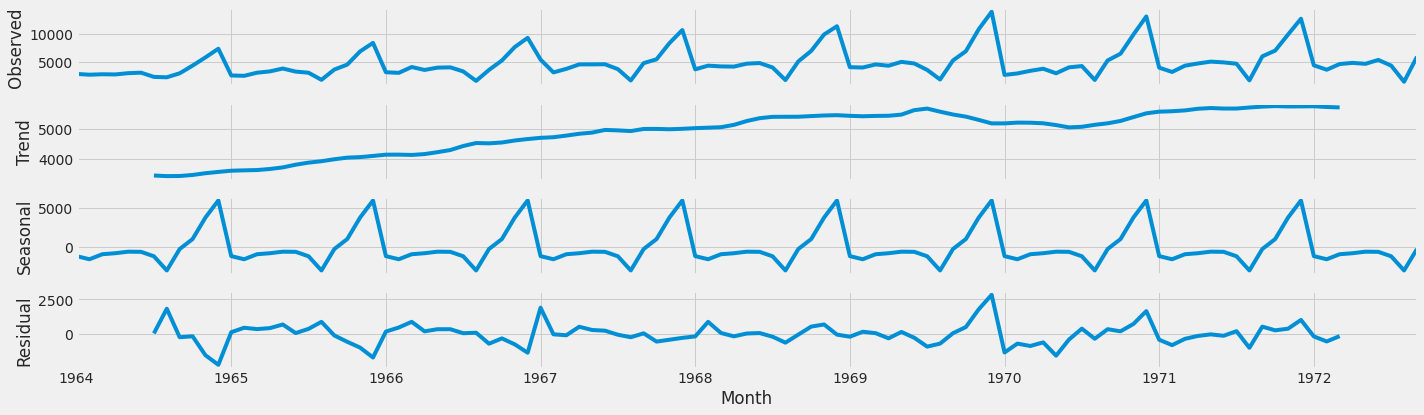

In [169]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 6

decomposition =seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Since,from the above we can see there is trends avalible in the data.Residual is low but seasonality is quite high.

## Lets have Stastical Analysis to understand the series is Stationary or Not ?

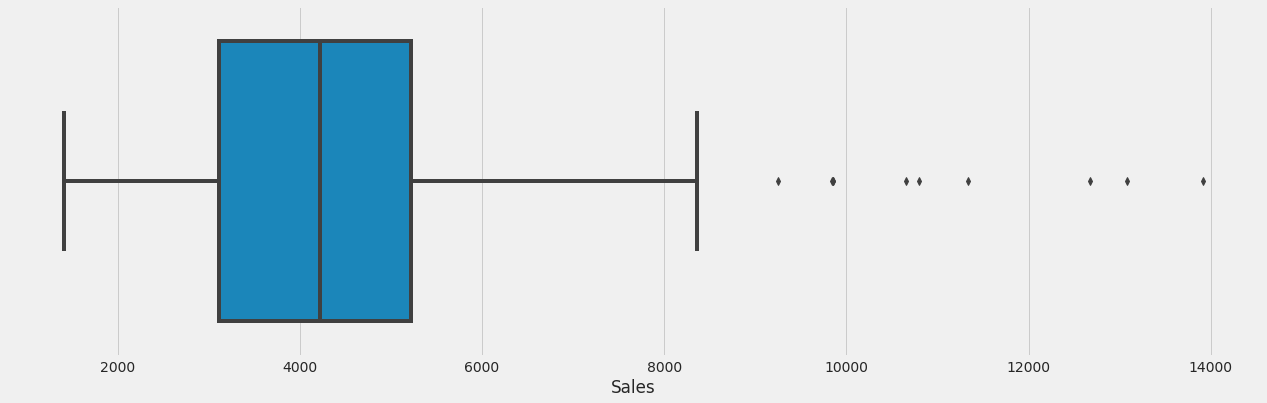

In [170]:
sns.boxplot(data['Sales'])
plt.show()

### Decayfuller Test.

In [171]:
from statsmodels.tsa.stattools import adfuller

In [172]:
ada_score,p_values,usedlag,nobs,critical_values,icbest=adfuller(data['Sales'])

In [173]:
def is_stationary(series):
  from statsmodels.tsa.stattools import adfuller
  ada_score,p_values,usedlag,nobs,critical_values,icbest=adfuller(series)
  print(p_values)

  if p_values>=0.05:
    print('It is Seasonal Series.')
  else:
    print('It is Stationary Series.')
  

In [174]:
is_stationary(data['Sales'])

0.36391577166024686
It is Seasonal Series.


Since It is Seasonal Series,It will constains lot of noise and outliers inside that can effect on the prediction so in oder to get the futher prediction we need take previous data.By taking the shift 12 we can make it Statinary,12 basically indicates the 12 month shift.If we take the 4 that means quaterly seasonality.

In [175]:
data['Seasnality Difference Prediction'] = data['Sales'] - data['Sales'].shift(12)

In [176]:
data.head(20)

,Sales,Seasnality Difference Prediction
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


We have taken the yearwise prediction in order to remove seasonality.

In [177]:
data1 = data.copy()

In [178]:
data1.dropna(inplace=True)

In [179]:
is_stationary(data1['Seasnality Difference Prediction'])

2.0605796968136632e-11
It is Stationary Series.


In [180]:
from sklearn.metrics import mean_squared_error

In [182]:
MSE = mean_squared_error(data1['Sales'],data1['Seasnality Difference Prediction'])
MSE

27655707.6344086

In [183]:
error =np.sqrt(MSE)
error

5258.869425495237

Our base model having very high error.

## Go for the Modeling.

- One thing always notice that whenever we have seasonal series make it to the statinary first then data stationary series we have to use to calculate the P,Q values.
- If we have already the Statinary data that time just add the shit of 1 for the forest values for the base values.
- In this way we will that seris here also.

In [185]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

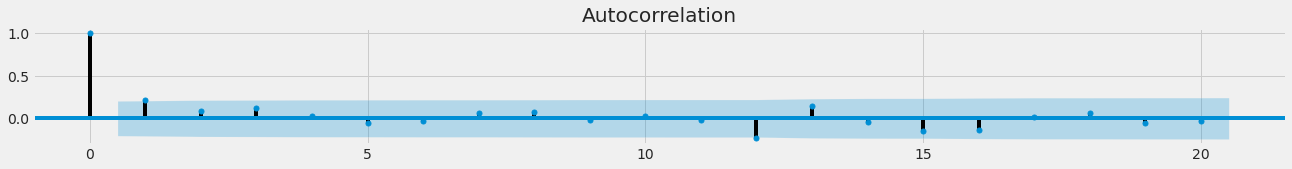

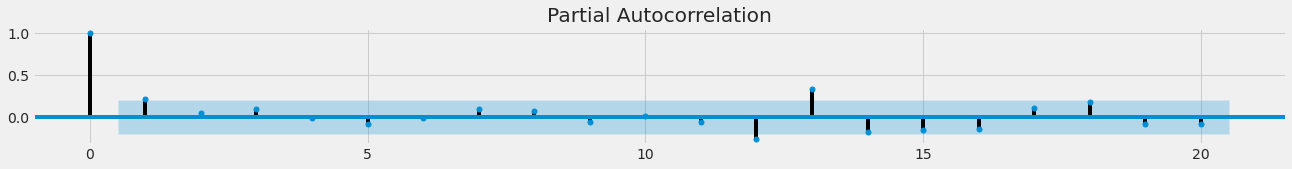

In [189]:
rcParams['figure.figsize'] = 20, 2
plot_acf(data1['Seasnality Difference Prediction'])
plot_pacf(data1['Seasnality Difference Prediction'])
plt.show()

Here we are getting the values p=1,D=1,Q=1,S=12 monthly and 4 quaterly,But here in this case 12.

# Now applying the Serimax Model.

In [193]:
import statsmodels.api as sm

In [200]:
model =sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

In [201]:
Forecast = model.forecast(len(data['Sales']))

In [202]:
dataframe = pd.DataFrame(dict(Actual=data['Sales'],Forecasted=Forecast))

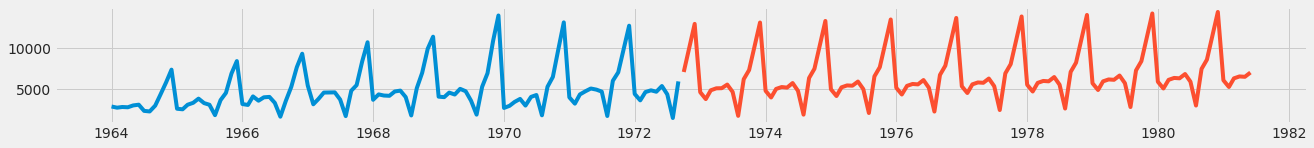

In [205]:
plt.plot(dataframe['Actual'])
plt.plot(dataframe['Forecasted'])
plt.show()

HERe,WE will calculate the error.


In [235]:
dataframe[dataframe['Actual'].isnull()==False].shape

(105, 2)

In [237]:
mse = mean_squared_error(dataframe['Actual'][:105],dataframe['Forecasted'][105:])
mse

21746413.03267352

In [240]:
error = np.sqrt(mse)
error

4663.304947424468

The error comes less as compare to the mean_squred_error.That's indicated the model is good.

## Train and  test prediction Lets see.

In [209]:
data['Sales'].shape

(105,)

In [219]:
train_data = data['Sales'][:70]
test_data = data['Sales'][70:]

In [220]:
model =sm.tsa.statespace.SARIMAX(train_data,order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

In [222]:
Forecast = model.forecast(len(test_data))

In [223]:
dataframe_1 = pd.DataFrame(dict(Actual=test_data,Predicted=Forecast))

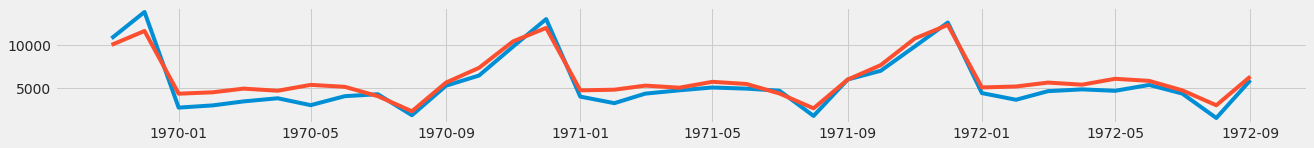

In [224]:
plt.plot(dataframe_1['Actual'])
plt.plot(dataframe_1['Predicted'])
plt.show()

## Error measurement.

In [226]:
MSE = mean_squared_error(dataframe_1['Actual'],dataframe_1['Predicted'])
MSE

1129350.6327633709

In [228]:
ERROR =np.sqrt(MSE)

In [229]:
ERROR

1062.709100724827

## Thank You !!